### 1. Read Json File

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and read the JSON file to extract new parameters
import json

# Path to the JSON file with new parameters
json_path = 'french_polynesia.json'

# Read the JSON file
with open(json_path, 'r') as file:
    df = json.load(file)

# Display the loaded parameters to confirm
df

{'Tmax': 60,
 'D': 26,
 'L': 1,
 'ls': 1,
 'le': 60,
 'α': 0.3,
 'β': 0.0625,
 'γ': 0.167,
 'reduction_factor': 0.0,
 'Connectivity Matrix W': {'Outside World_AP,Tahiti_AP': 300,
  'Outside World_FP,Tahiti_FP': 300,
  'Bora Bora_AP,Fakarava_AP': 57,
  'Bora Bora_AP,Huahine_AP': 237,
  'Bora Bora_AP,Maupiti_AP': 38,
  'Bora Bora_AP,Moorea_AP': 199,
  'Bora Bora_AP,Raiatea_AP': 379,
  'Bora Bora_AP,Rangiroa_AP': 133,
  "Bora Bora_FP,Taha'a_FP": 193,
  'Bora Bora_AP,Tikehau_AP': 76,
  'Moorea_AP,Huahine_AP': 75,
  'Moorea_FP,Huahine_FP': 96,
  'Moorea_AP,Raiatea_AP': 57,
  'Nuku Hiva_AP,Hiva Oa_AP': 104,
  'Nuku Hiva_AP,Ua Huka_AP': 123,
  'Nuku Hiva_AP,Ua Pou_AP': 161,
  'Raiatea_AP,Huahine_AP': 341,
  'Raiatea_FP,Huahine_FP': 192,
  'Raiatea_AP,Maupiti_AP': 133,
  'Raiatea_AP,Rangiroa_AP': 9,
  "Raiatea_FP,Taha'a_FP": 193,
  'Raiatea_AP,Tikehau_AP': 9,
  'Rangiroa_AP,Fakarava_AP': 85,
  'Rangiroa_AP,Mataiva_AP': 19,
  'Rangiroa_AP,Tikehau_AP': 104,
  'Rurutu_AP,Rimatara_AP': 38,
  'Ruru

In [165]:
connection = df['Connectivity Matrix W'].copy()
connection

{'Outside World_AP,Tahiti_AP': 300,
 'Outside World_FP,Tahiti_FP': 300,
 'Bora Bora_AP,Fakarava_AP': 57,
 'Bora Bora_AP,Huahine_AP': 237,
 'Bora Bora_AP,Maupiti_AP': 38,
 'Bora Bora_AP,Moorea_AP': 199,
 'Bora Bora_AP,Raiatea_AP': 379,
 'Bora Bora_AP,Rangiroa_AP': 133,
 "Bora Bora_FP,Taha'a_FP": 193,
 'Bora Bora_AP,Tikehau_AP': 76,
 'Moorea_AP,Huahine_AP': 75,
 'Moorea_FP,Huahine_FP': 96,
 'Moorea_AP,Raiatea_AP': 57,
 'Nuku Hiva_AP,Hiva Oa_AP': 104,
 'Nuku Hiva_AP,Ua Huka_AP': 123,
 'Nuku Hiva_AP,Ua Pou_AP': 161,
 'Raiatea_AP,Huahine_AP': 341,
 'Raiatea_FP,Huahine_FP': 192,
 'Raiatea_AP,Maupiti_AP': 133,
 'Raiatea_AP,Rangiroa_AP': 9,
 "Raiatea_FP,Taha'a_FP": 193,
 'Raiatea_AP,Tikehau_AP': 9,
 'Rangiroa_AP,Fakarava_AP': 85,
 'Rangiroa_AP,Mataiva_AP': 19,
 'Rangiroa_AP,Tikehau_AP': 104,
 'Rurutu_AP,Rimatara_AP': 38,
 'Rurutu_AP,Tubuai_AP': 47,
 'Tahiti_AP,Ahe_AP': 95,
 'Tahiti_AP,Arutua_AP': 95,
 'Tahiti_AP,Bora Bora_AP': 2238,
 'Tahiti_AP,Fakarava_AP': 218,
 'Tahiti_AP,Gambier_AP': 95,
 

In [166]:
community = df['ports_according_communities'].copy()


In [167]:
n = df['n'].copy()
outside_world = {'Outside World': n.pop('Outside World')}
sorted_data = {k: n[k] for k in sorted(n)}
population = {**outside_world, **sorted_data}
population

{'Outside World': 313600,
 'Ahe': 490,
 'Arutua': 1736,
 'Bora Bora': 10758,
 'Fakarava': 1679,
 'Gambier': 1570,
 'Hao': 1227,
 'Hiva Oa': 2371,
 'Huahine': 6263,
 'Makemo': 1391,
 'Manihi': 1138,
 'Mataiva': 292,
 'Maupiti': 1302,
 'Moorea': 18201,
 'Nuku Hiva': 3025,
 'Raiatea': 12388,
 'Raivavae': 900,
 'Rangiroa': 3761,
 'Rimatara': 893,
 'Rurutu': 2163,
 "Taha'a": 5296,
 'Tahiti': 191779,
 'Tikehau': 589,
 'Tubuai': 2185,
 'Ua Huka': 719,
 'Ua Pou': 2168}

### 2. Construct simulation locations and connections

In [168]:
def connections_to_locations(community, connection):
    port_to_location = {}
    for location, ports in community.items():
        for port in ports:
            port_to_location[port] = location

    location_connections = {}

    for key, value in connection.items():
        port1, port2 = key.split(',')
        loc1 = port_to_location.get(port1.strip(), None)
        loc2 = port_to_location.get(port2.strip(), None)


        if loc1 and loc2:
            sorted_locs = tuple(sorted([loc1, loc2]))

            if sorted_locs in location_connections:
                location_connections[sorted_locs] += value
            else:
                location_connections[sorted_locs] = value
    formatted_connections = {}
    for locations, flow in location_connections.items():
        loc1, loc2 = locations
        formatted_connections[f'{loc1},{loc2}'] = flow

    return formatted_connections

connection = connections_to_locations(community, connection)

connection

{'Outside World,Tahiti': 600,
 'Bora Bora,Fakarava': 57,
 'Bora Bora,Huahine': 237,
 'Bora Bora,Maupiti': 38,
 'Bora Bora,Moorea': 199,
 'Bora Bora,Raiatea': 379,
 'Bora Bora,Rangiroa': 133,
 "Bora Bora,Taha'a": 193,
 'Bora Bora,Tikehau': 76,
 'Huahine,Moorea': 171,
 'Moorea,Raiatea': 57,
 'Hiva Oa,Nuku Hiva': 104,
 'Nuku Hiva,Ua Huka': 123,
 'Nuku Hiva,Ua Pou': 161,
 'Huahine,Raiatea': 533,
 'Maupiti,Raiatea': 133,
 'Raiatea,Rangiroa': 9,
 "Raiatea,Taha'a": 193,
 'Raiatea,Tikehau': 9,
 'Fakarava,Rangiroa': 85,
 'Mataiva,Rangiroa': 19,
 'Rangiroa,Tikehau': 104,
 'Rimatara,Rurutu': 38,
 'Rurutu,Tubuai': 47,
 'Ahe,Tahiti': 95,
 'Arutua,Tahiti': 95,
 'Bora Bora,Tahiti': 2238,
 'Fakarava,Tahiti': 218,
 'Gambier,Tahiti': 95,
 'Hao,Tahiti': 133,
 'Hiva Oa,Tahiti': 306,
 'Huahine,Tahiti': 96,
 'Makemo,Tahiti': 104,
 'Manihi,Tahiti': 95,
 'Mataiva,Tahiti': 76,
 'Maupiti,Tahiti': 284,
 'Moorea,Tahiti': 5069,
 'Nuku Hiva,Tahiti': 325,
 'Raiatea,Tahiti': 1717,
 'Raivavae,Tahiti': 76,
 'Rangiroa,T

In [169]:
community = population.copy()

### 3. Create Connectivity Matrix W

In [170]:
def connection_matrix(connection,community):
    """
    Creates two matrices from a dictionary of connections between communities. One matrix is binary (indicating presence
    or absence of a connection), and the other matrix records the volume of each connection.

    Args:
        connection (dict): A dictionary where keys are strings formatted as "Departure,Arrival" and values are 
                           integers representing the volume of the connection between the communities.
        community (dict): A dictionary of communities where keys are community names and values are the population
                          or other relevant attributes (although these values are not used in this function).

    Returns:
        tuple: A tuple containing two DataFrames:
               1. A binary connection matrix (pandas DataFrame) where each cell [i, j] is 1 if there is a connection
                  between community i and community j, and 0 otherwise.
               2. A volume connection matrix (pandas DataFrame) where each cell [i, j] contains the volume of the 
                  connection between community i and community j if one exists, otherwise 0.
    """
    # Extract unique community names as locations
    locations = list(community.keys())
    
    # Create a zero-initialized square matrix
    matrix_zero = np.zeros((len(locations), len(locations)), dtype=int)
    
    matrix_binary = pd.DataFrame(matrix_zero.copy(), index=locations, columns=locations)
    matrix_volume = pd.DataFrame(matrix_zero.copy(), index=locations, columns=locations)
    
    # Update the matrix based on connections
    for con, vol in connection.items():
        dep, ari = con.split(',')
        if dep in locations and ari in locations:
            # Set the connection to 1
            matrix_binary.loc[dep, ari] = 1
            matrix_binary.loc[ari, dep] = 1 # Bidirectional connection
            # Set the connection to volumn
            matrix_volume.loc[dep, ari] = vol
            matrix_volume.loc[ari, dep] = vol # Bidirectional connection
    
            
    return matrix_binary,matrix_volume


In [171]:
binary_matrix,volume_matrix = connection_matrix(connection,community)
    
binary_matrix

,Outside World,Ahe,Arutua,Bora Bora,Fakarava,Gambier,Hao,Hiva Oa,Huahine,Makemo,...,Raivavae,Rangiroa,Rimatara,Rurutu,Taha'a,Tahiti,Tikehau,Tubuai,Ua Huka,Ua Pou
Outside World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Ahe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Arutua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Bora Bora,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,1,1,0,0,0
Fakarava,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
Gambier,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Hao,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Hiva Oa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Huahine,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Makemo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [172]:
volume_matrix

,Outside World,Ahe,Arutua,Bora Bora,Fakarava,Gambier,Hao,Hiva Oa,Huahine,Makemo,...,Raivavae,Rangiroa,Rimatara,Rurutu,Taha'a,Tahiti,Tikehau,Tubuai,Ua Huka,Ua Pou
Outside World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,600,0,0,0,0
Ahe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,95,0,0,0,0
Arutua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,95,0,0,0,0
Bora Bora,0,0,0,0,57,0,0,0,237,0,...,0,133,0,0,193,2238,76,0,0,0
Fakarava,0,0,0,57,0,0,0,0,0,0,...,0,85,0,0,0,218,9,0,0,0
Gambier,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,95,0,0,0,0
Hao,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,133,0,0,0,0
Hiva Oa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,306,0,0,0,9
Huahine,0,0,0,237,0,0,0,0,0,0,...,0,0,0,0,0,96,0,0,0,0
Makemo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,104,0,0,0,0


### 4. Set up Outside World and Locations Initional SEIR statement

In [173]:

def seir_statement(day, community_seir): # inbound,
    """
    Updates or initializes the SEIR model states for a community with additional inbound effects.

    Args:
        day (int): Current simulation day. If day == 1, initialize the SEIR model.
        inbound (list): A list containing the minimum and maximum expected inbound individuals,
                        and the exposure rate among them.
        community (dict): A dictionary of communities with their initial populations.
        expose_rate (float): The rate at which inbound individuals are exposed to the disease.

    Returns:
        pd.DataFrame: A DataFrame containing updated SEIR values and ratios for each community.
    """
    
    # Initialize or copy the community DataFrame
    
    
    if day == 1:
        # Initial locations and population
        community_seir['Outside World'] = 0
        community_seir = pd.DataFrame(list(community_seir.values()), index=community_seir.keys(), columns=['Population'])
        # Initialize SEIR columns
        community_seir['S'] = community_seir['Population']
        community_seir['E'] = 0
        community_seir['I'] = 0
        community_seir['R'] = 0
    
    else:
        # Assume community_seir is already a DataFrame
        community_seir = community_seir.copy()
        
    # # Random inbound population between the specified bounds
    # P = np.random.randint(inbound[0], inbound[1] + 1)
    # E = int(P * inbound[2])  # Exposed individuals among inbound
    # S = P - E                # Susceptible individuals among inbound
    # I, R = 0, 0              # Initially, no infected or recovered in inbound

    # Update the 'Outside World' inbound directly in the DataFrame
        
    community_seir.loc['Outside World', 'Population'] = 0
    community_seir.loc['Outside World', 'S'] = 0
    community_seir.loc['Outside World', 'E'] = 0
    community_seir.loc['Outside World', 'I'] = 0
    community_seir.loc['Outside World', 'R'] = 0

    # Calculate the population ratios of S, E, I, and R
    community_seir['S_ratio'] = community_seir['S'] / community_seir['Population']
    community_seir['E_ratio'] = community_seir['E'] / community_seir['Population']
    community_seir['I_ratio'] = community_seir['I'] / community_seir['Population']
    community_seir['R_ratio'] = community_seir['R'] / community_seir['Population']
    

    return community_seir


In [174]:
#seir_statement_record = {}
community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1
day=1
community_seir = seir_statement(day, community_seir)
#seir_statement_record[day] = community_seir
community_seir

,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,0,0,0,0,0,NaN,NaN,NaN,NaN
Ahe,490,490,0,0,0,1.0,0.0,0.0,0.0
Arutua,1736,1736,0,0,0,1.0,0.0,0.0,0.0
Bora Bora,10758,10758,0,0,0,1.0,0.0,0.0,0.0
Fakarava,1679,1679,0,0,0,1.0,0.0,0.0,0.0
Gambier,1570,1570,0,0,0,1.0,0.0,0.0,0.0
Hao,1227,1227,0,0,0,1.0,0.0,0.0,0.0
Hiva Oa,2371,2371,0,0,0,1.0,0.0,0.0,0.0
Huahine,6263,6263,0,0,0,1.0,0.0,0.0,0.0
Makemo,1391,1391,0,0,0,1.0,0.0,0.0,0.0


In [83]:
#day = 2
#community_seir = seir_statement(2, inbound, community_seir)
#seir_statement_record[day] = community_seir
#community_seir


In [84]:
#seir_statement_record[1]

In [85]:
#seir_statement_record[2]

### 5. Migration between locations

In [175]:
def migration(community_seir, binary_matrix, volume_matrix, inbound):
    communities = community_seir.index
    migration_df = pd.DataFrame(0, index=communities, columns=['S_out', 'E_out', 'I_out', 'R_out', 'S_in', 'E_in', 'I_in', 'R_in'])

    for source in communities:
        for target in communities:
            if source != target and binary_matrix.loc[source, target] == 1:
                if source == 'Outside World':
                    # Random inbound population between the specified bounds
                    P = np.random.randint(inbound[0], inbound[1] + 1)
                    E = int(P * inbound[2])
                    S = P - E
                    I, R = 0, 0
                    max_migrants = P

                    # Ensure we do not exceed the available population in "Outside World"
                    max_migrants = min(max_migrants, community_seir.loc['Outside World', ['S', 'E', 'I', 'R']].sum())
                    selected_counts = pd.Series({'S': S, 'E': E, 'I': I, 'R': R})

                    for seir_type in ['S', 'E', 'I', 'R']:
                        migrants_count = selected_counts.get(seir_type, 0)
                        migration_df.loc[source, seir_type + '_out'] += migrants_count
                        migration_df.loc[target, seir_type + '_in'] += migrants_count
                        community_seir.loc[source, seir_type] -= migrants_count
                        community_seir.loc[target, seir_type] += migrants_count

                    # Randomly select SEIR individuals to return to "Outside World"
                    total_migrants_back = sum(selected_counts.values)
                    available_seir = community_seir.loc[target, ['S', 'E', 'I', 'R']].clip(lower=0)
                    repeats = available_seir.astype(int).values
                    population_indices = np.repeat(['S', 'E', 'I', 'R'], repeats)

                    if total_migrants_back > len(population_indices):
                        total_migrants_back = len(population_indices)

                    selected_indices = np.random.choice(population_indices, size=total_migrants_back, replace=False)
                    selected_counts_back = pd.Series(selected_indices).value_counts()

                    for seir_type in ['S', 'E', 'I', 'R']:
                        migrants_count = selected_counts_back.get(seir_type, 0)
                        migration_df.loc[target, seir_type + '_out'] += migrants_count
                        migration_df.loc[source, seir_type + '_in'] += migrants_count
                        community_seir.loc[target, seir_type] -= migrants_count
                        community_seir.loc[source, seir_type] += migrants_count

                elif target == 'Outside World':
                    # No need to handle separately as it's symmetric to above

                    pass
                else:
                    max_migrants = int(volume_matrix.loc[source, target] * 0.8)
                    available_seir = community_seir.loc[source, ['S', 'E', 'I', 'R']].clip(lower=0)
                    total_available = available_seir.sum()
                    
                    if total_available > 0 and max_migrants > 0:
                        max_migrants = min(int(max_migrants), int(total_available))
                        
                        repeats = available_seir.astype(int).values
                        population_indices = np.repeat(['S', 'E', 'I', 'R'], repeats)
                        
                        if max_migrants > len(population_indices):
                            max_migrants = len(population_indices)
                        selected_indices = np.random.choice(population_indices, size=max_migrants, replace=False)
                        
                        selected_counts = pd.Series(selected_indices).value_counts()
                        
                        for seir_type in ['S', 'E', 'I', 'R']:
                            migrants_count = selected_counts.get(seir_type, 0)
                            migration_df.loc[source, seir_type + '_out'] += migrants_count
                            migration_df.loc[target, seir_type + '_in'] += migrants_count
                            community_seir.loc[source, seir_type] -= migrants_count
                            community_seir.loc[target, seir_type] += migrants_count

    community_seir['S_ratio'] = community_seir['S'] / community_seir['Population']
    community_seir['E_ratio'] = community_seir['E'] / community_seir['Population']
    community_seir['I_ratio'] = community_seir['I'] / community_seir['Population']
    community_seir['R_ratio'] = community_seir['R'] / community_seir['Population']
    
    return community_seir, migration_df

# Apply the updated migration function
community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)

print(migration_df)


               S_out  E_out  I_out  R_out   S_in  E_in  I_in  R_in
Outside World    331     36      0      0    367     0     0     0
Ahe               76      0      0      0     76     0     0     0
Arutua            76      0      0      0     76     0     0     0
Bora Bora       2836      0      0      0   2836     0     0     0
Fakarava         294      0      0      0    294     0     0     0
Gambier           76      0      0      0     76     0     0     0
Hao              106      0      0      0    106     0     0     0
Hiva Oa          334      0      0      0    334     0     0     0
Huahine          827      0      0      0    827     0     0     0
Makemo            83      0      0      0     83     0     0     0
Manihi            76      0      0      0     76     0     0     0
Mataiva           75      0      0      0     75     0     0     0
Maupiti          363      0      0      0    363     0     0     0
Moorea          4395      0      0      0   4394     1     0  

In [107]:
migration_df

,S_out,E_out,I_out,R_out,S_in,E_in,I_in,R_in
Outside World,225,24,0,0,249,0,0,0
Ahe,76,0,0,0,76,0,0,0
Arutua,76,0,0,0,76,0,0,0
Bora Bora,2836,0,0,0,2836,0,0,0
Fakarava,294,0,0,0,294,0,0,0
Gambier,76,0,0,0,76,0,0,0
Hao,106,0,0,0,106,0,0,0
Hiva Oa,334,0,0,0,333,1,0,0
Huahine,827,0,0,0,827,0,0,0
Makemo,83,0,0,0,83,0,0,0


In [108]:
community_seir

,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,0,24,-24,0,0,inf,-inf,NaN,NaN
Ahe,490,490,0,0,0,1.000000,0.000000,0.0,0.0
Arutua,1736,1736,0,0,0,1.000000,0.000000,0.0,0.0
Bora Bora,10758,10758,0,0,0,1.000000,0.000000,0.0,0.0
Fakarava,1679,1679,0,0,0,1.000000,0.000000,0.0,0.0
Gambier,1570,1570,0,0,0,1.000000,0.000000,0.0,0.0
Hao,1227,1227,0,0,0,1.000000,0.000000,0.0,0.0
Hiva Oa,2371,2370,1,0,0,0.999578,0.000422,0.0,0.0
Huahine,6263,6263,0,0,0,1.000000,0.000000,0.0,0.0
Makemo,1391,1391,0,0,0,1.000000,0.000000,0.0,0.0


In [109]:
# Still has problem in Outside World in population
migration_df

,S_out,E_out,I_out,R_out,S_in,E_in,I_in,R_in
Outside World,225,24,0,0,249,0,0,0
Ahe,76,0,0,0,76,0,0,0
Arutua,76,0,0,0,76,0,0,0
Bora Bora,2836,0,0,0,2836,0,0,0
Fakarava,294,0,0,0,294,0,0,0
Gambier,76,0,0,0,76,0,0,0
Hao,106,0,0,0,106,0,0,0
Hiva Oa,334,0,0,0,333,1,0,0
Huahine,827,0,0,0,827,0,0,0
Makemo,83,0,0,0,83,0,0,0


### 6. Infection inside locations

In [92]:
# def infection(α, β, γ, community_seir):
#     """
#     Simulate the infection process within each community based on the SEIR model.

#     Args:
#         α (float): Transmission rate, the probability of susceptible individuals becoming exposed.
#         β (float): Recovery rate, the probability of infected individuals recovering.
#         γ (float): Progression rate, the probability of exposed individuals becoming infectious.
#         community_seir (pd.DataFrame): A DataFrame containing the SEIR values for each community,
#                                        indexed by community names with columns for 'S', 'E', 'I', 'R' and their ratios.

#     Returns:
#         pd.DataFrame: Updated DataFrame after applying the infection dynamics to each community.
#     """
#     # Create a copy to update the community SEIR values without altering the original during iteration
#     updated_seir = community_seir.copy()
    
#     for index, row in updated_seir.iterrows():
#         n = row['S'] + row['E'] + row['I'] + row['R']
#         if n > 0:
#             S, E, I, R = row['S'], row['E'], row['I'], row['R']
#             δ_SE = np.random.binomial(S, α * I / n if I > 0 else 0)  # Susceptible to Exposed
#             δ_EI = np.random.binomial(E, γ)  # Exposed to Infected
#             δ_IR = np.random.binomial(I, β)  # Infected to Recovered
            
#             # Update the SEIR counts
#             updated_seir.at[index, 'S'] = S - δ_SE
#             updated_seir.at[index, 'E'] = E + δ_SE - δ_EI
#             updated_seir.at[index, 'I'] = I + δ_EI - δ_IR
#             updated_seir.at[index, 'R'] = R + δ_IR

#             # Update the ratios
#             total_pop = updated_seir.at[index, 'S'] + updated_seir.at[index, 'E'] + updated_seir.at[index, 'I'] + updated_seir.at[index, 'R']
#             updated_seir.at[index, 'S_ratio'] = updated_seir.at[index, 'S'] / total_pop
#             updated_seir.at[index, 'E_ratio'] = updated_seir.at[index, 'E'] / total_pop
#             updated_seir.at[index, 'I_ratio'] = updated_seir.at[index, 'I'] / total_pop
#             updated_seir.at[index, 'R_ratio'] = updated_seir.at[index, 'R'] / total_pop
    
#     return updated_seir


In [176]:
def infection(α, β, γ, lockdown_communities, community_seir, reduction_factor):
    """
    Simulate the infection process within each community based on the SEIR model.

    Args:
        α (float): Transmission rate, the probability of susceptible individuals becoming exposed.
        β (float): Recovery rate, the probability of infected individuals recovering.
        γ (float): Progression rate, the probability of exposed individuals becoming infectious.
        community_seir (pd.DataFrame): A DataFrame containing the SEIR values for each community,
                                       indexed by community names with columns for 'S', 'E', 'I', 'R' and their ratios.

    Returns:
        pd.DataFrame: Updated DataFrame after applying the infection dynamics to each community.
    """
    # Create a copy to update the community SEIR values without altering the original during iteration
    updated_seir = community_seir.copy()
    
    for index, row in updated_seir.iterrows():
        if index != 'Outside World':  # Skip "Outside World"
            n = row['S'] + row['E'] + row['I'] + row['R']
            
            if n > 0:
                S, E, I, R = row['S'], row['E'], row['I'], row['R']
                if index in lockdown_communities:
                    δ_SE = np.random.binomial(S, (α * I / n if I > 0 else 0) * reduction_factor)  # Susceptible to Exposed
                else:
                    δ_SE = np.random.binomial(S, α * I / n if I > 0 else 0)  # Susceptible to Exposed
                δ_EI = np.random.binomial(E, γ)  # Exposed to Infected
                δ_IR = np.random.binomial(I, β)  # Infected to Recovered
                
                # Update the SEIR counts
                updated_seir.at[index, 'S'] = S - δ_SE
                updated_seir.at[index, 'E'] = E + δ_SE - δ_EI
                updated_seir.at[index, 'I'] = I + δ_EI - δ_IR
                updated_seir.at[index, 'R'] = R + δ_IR

                # Update the ratios
                #total_pop = updated_seir.at[index, 'S'] + updated_seir.at[index, 'E'] + updated_seir.at[index, 'I'] + updated_seir.at[index, 'R']
                updated_seir.at[index, 'S_ratio'] = updated_seir.at[index, 'S'] / updated_seir.at[index, 'Population']
                updated_seir.at[index, 'E_ratio'] = updated_seir.at[index, 'E'] / updated_seir.at[index, 'Population']
                updated_seir.at[index, 'I_ratio'] = updated_seir.at[index, 'I'] / updated_seir.at[index, 'Population']
                updated_seir.at[index, 'R_ratio'] = updated_seir.at[index, 'R'] / updated_seir.at[index, 'Population']
    
    return updated_seir,δ_EI

# Example parameters for the infection function
α = 0.6
β = 0.2
γ = 0.3

# Running the migration function
community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)

reduction_factor = 1
lockdown_communities = []
# Running the infection function
community_seir, new_cases= infection(α, β, γ, lockdown_communities, community_seir,reduction_factor)

print(community_seir)
print(migration_df)



               Population       S   E   I  R   S_ratio   E_ratio   I_ratio  \
Outside World           0      58 -58   0  0       inf      -inf       NaN   
Ahe                   490     490   0   0  0  1.000000  0.000000  0.000000   
Arutua               1736    1736   0   0  0  1.000000  0.000000  0.000000   
Bora Bora           10758   10758   0   0  0  1.000000  0.000000  0.000000   
Fakarava             1679    1679   0   0  0  1.000000  0.000000  0.000000   
Gambier              1570    1570   0   0  0  1.000000  0.000000  0.000000   
Hao                  1227    1227   0   0  0  1.000000  0.000000  0.000000   
Hiva Oa              2371    2371   0   0  0  1.000000  0.000000  0.000000   
Huahine              6263    6263   0   0  0  1.000000  0.000000  0.000000   
Makemo               1391    1391   0   0  0  1.000000  0.000000  0.000000   
Manihi               1138    1138   0   0  0  1.000000  0.000000  0.000000   
Mataiva               292     291   0   1  0  0.996575  0.000000

In [17]:
α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

x_updated = infection(α, β, γ, community_seir)
x_updated


TypeError: infection() missing 2 required positional arguments: 'community_seir' and 'reduction_factor'

In [95]:
def lockdown(location, binary_matrix):
    if location in binary_matrix.index:
        location.value ==0
    else:
        print("Location missing")    

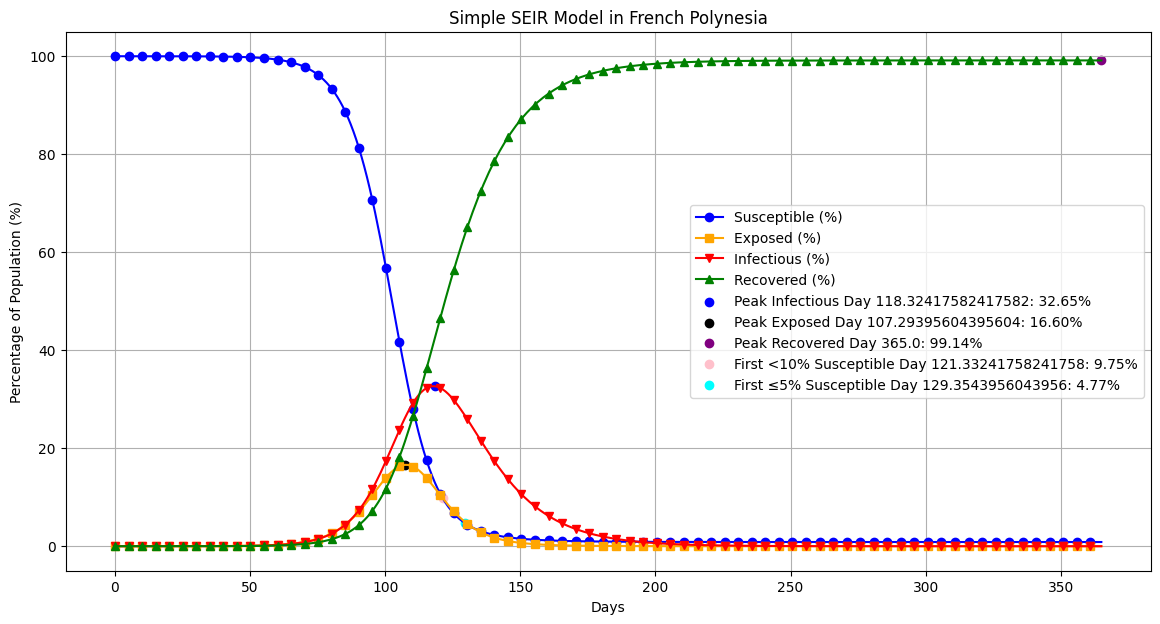

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# SEIR model parameters
alpha = 0.3  # Transmission rate
beta = 0.0625   # Recovery rate
gamma = 0.167  # Progression rate
days = 365
population = 274284  # French Polynesia population size

# # Initial states
# S0 = int(0.99 * population)
# E0 = int(0.005 * population)
# I0 = int(0.001 * population)
# R0 = int(0.004 * population)
# initial_state = [S0, E0, I0, R0]

# Initial states
S0 = int(0.99999 * population)
E0 = int(0.00001 * population)
I0 = int(0 * population)
R0 = int(0 * population)
initial_state = [S0, E0, I0, R0]

# SEIR model differential equations
def seir(y, t, alpha, beta, gamma, population):
    S, E, I, R = y
    dS_dt = -alpha * S * I / population
    dE_dt = alpha * S * I / population - gamma * E
    dI_dt = gamma * E - beta * I
    dR_dt = beta * I
    return [dS_dt, dE_dt, dI_dt, dR_dt]

# Time grid
time = np.linspace(0, days, days)

# Solve the SEIR equations using odeint
solution = odeint(seir, initial_state, time, args=(alpha, beta, gamma, population))
S, E, I, R = solution.T

# Convert populations to percentages of the total population
S_percent = (S / population) * 100
E_percent = (E / population) * 100
I_percent = (I / population) * 100
R_percent = (R / population) * 100

# Identify key points
max_I_idx = np.argmax(I)
max_E_idx = np.argmax(E)
max_R_idx = np.argmax(R)
first_digit_zero_S_idx = np.where(S_percent < 10)[0][0]
first_five_percent_S_idx = np.where(S_percent <= 5)[0][0]

# Combine data for better visualization
seir_history = {
    day: pd.DataFrame({'S': [S[day]], 'E': [E[day]], 'I': [I[day]], 'R': [R[day]]})
    for day in range(days)
}

def seir_plot(method_start, method_end, seir_history):
    all_days = []
    for day, df in seir_history.items():
        df['Day'] = day
        all_days.append(df.copy())

    full_data = pd.concat(all_days)
    national_seir = full_data.groupby('Day').sum()
    national_seir['Total'] = national_seir[['S', 'E', 'I', 'R']].sum(axis=1)

    for compartment in ['S', 'E', 'I', 'R']:
        national_seir[f'{compartment}_ratio'] = national_seir[compartment] / national_seir['Total']
        
    marker_every = 5
    
    colors = {
    'S': 'blue',   # Susceptible - Blue
    'E': 'orange', # Exposed - Orange
    'I': 'red',    # Infected - Red
    'R': 'green'   # Recovered - Green
    }

    plt.figure(figsize=(14, 7))
    # Plot with different markers for each compartment
    plt.plot(national_seir.index, national_seir['S_ratio'], label='S - Susceptible', marker='o', linestyle='-', markevery=marker_every, color=colors['S'])  # Circle markers
    plt.plot(national_seir.index, national_seir['E_ratio'], label='E - Exposed', marker='s', linestyle='-', markevery=marker_every, color=colors['E'])  # Square markers
    plt.plot(national_seir.index, national_seir['I_ratio'], label='I - Infected', marker='v', linestyle='-', markevery=marker_every, color=colors['I'])  # Triangle_down markers
    plt.plot(national_seir.index, national_seir['R_ratio'], label='R - Recovered', marker='^', linestyle='-', markevery=marker_every, color=colors['R'])  # Triangle_up markers

    # Highlight the intervention period
    plt.axvspan(method_start, method_end, color='grey', alpha=0.5, label='Intervention Period')

    plt.title('National SEIR Ratios Over Time')
    plt.xlabel('Day')
    plt.ylabel('Ratio')
    plt.ylim(0, 1)  
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot with key points and new colors/markers
plt.figure(figsize=(14, 7))
plt.plot(time, S_percent, label="Susceptible (%)", color='blue', marker='o', linestyle='-', markevery=5)
plt.plot(time, E_percent, label="Exposed (%)", color='orange', marker='s', linestyle='-', markevery=5)
plt.plot(time, I_percent, label="Infectious (%)", color='red', marker='v', linestyle='-', markevery=5)
plt.plot(time, R_percent, label="Recovered (%)", color='green', marker='^', linestyle='-', markevery=5)
plt.scatter(time[max_I_idx], I_percent[max_I_idx], color='blue', label=f'Peak Infectious Day {time[max_I_idx]}: {I_percent[max_I_idx]:.2f}%')
plt.scatter(time[max_E_idx], E_percent[max_E_idx], color='black', label=f'Peak Exposed Day {time[max_E_idx]}: {E_percent[max_E_idx]:.2f}%')
plt.scatter(time[max_R_idx], R_percent[max_R_idx], color='purple', label=f'Peak Recovered Day {time[max_R_idx]}: {R_percent[max_R_idx]:.2f}%')
plt.scatter(time[first_digit_zero_S_idx], S_percent[first_digit_zero_S_idx], color='pink', label=f'First <10% Susceptible Day {time[first_digit_zero_S_idx]}: {S_percent[first_digit_zero_S_idx]:.2f}%')
plt.scatter(time[first_five_percent_S_idx], S_percent[first_five_percent_S_idx], color='cyan', label=f'First ≤5% Susceptible Day {time[first_five_percent_S_idx]}: {S_percent[first_five_percent_S_idx]:.2f}%')
plt.xlabel("Days")
plt.ylabel("Percentage of Population (%)")
plt.title("Simple SEIR Model in French Polynesia")
plt.legend()
plt.grid(True)
plt.show()

# # Example of using the seir_plot function
# method_start = 100  # Example start day of intervention
# method_end = 200    # Example end day of intervention
# seir_plot(method_start, method_end, seir_history)

### 7. Simulation

In [64]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.0625  # Recovery rate
γ = 0.167  # Progression rate from exposed to infectious

no_measure = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)

    community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
    #print(migration_df)
    
    community_seir = infection(α, β, γ, community_seir)
    no_measure[day] = community_seir

    #print("Day", day, ":")
    #print(community_seir)

TypeError: infection() missing 2 required positional arguments: 'community_seir' and 'reduction_factor'

In [99]:
no_measure

{1:                Population       S   E  I  R   S_ratio   E_ratio   I_ratio  \
 Outside World           0      24 -24  0  0       inf      -inf       NaN   
 Ahe                   490     490   0  0  0  1.000000  0.000000  0.000000   
 Arutua               1736    1736   0  0  0  1.000000  0.000000  0.000000   
 Bora Bora           10758   10758   0  0  0  1.000000  0.000000  0.000000   
 Fakarava             1679    1679   0  0  0  1.000000  0.000000  0.000000   
 Gambier              1570    1570   0  0  0  1.000000  0.000000  0.000000   
 Hao                  1227    1227   0  0  0  1.000000  0.000000  0.000000   
 Hiva Oa              2371    2371   0  0  0  1.000000  0.000000  0.000000   
 Huahine              6263    6263   0  0  0  1.000000  0.000000  0.000000   
 Makemo               1391    1391   0  0  0  1.000000  0.000000  0.000000   
 Manihi               1138    1138   0  0  0  1.000000  0.000000  0.000000   
 Mataiva               292     292   0  0  0  1.000000  0.000

In [177]:
def savefile(seir,name):
    all_days = []
    for day, df in seir.items():
        # filter 'Outside World'
        df_filtered = df.loc[df.index != 'Outside World'].copy()
        df_filtered['Day'] = day
        all_days.append(df_filtered.copy())
        
    full_data = pd.concat(all_days)
    national_seir = full_data.groupby('Day').sum()

    national_seir['Total'] = national_seir[['S', 'E', 'I', 'R']].sum(axis=1)
    # CSV
    output_path = f'{name}.csv'
    national_seir.to_csv(output_path)
    print(f'All data saved to {output_path}')

Remove the influence of “Outside World” because the number of inbound and outbound populations remains consistent.

In [136]:
savefile(seir_history,'fp_simple_seir')

All data saved to fp_simple_seir.csv


In [106]:
savefile(no_measure,'fp_no_measure')

All data saved to fp_no_measure.csv


In [29]:


# def seir_plot(method_start, method_end, seir_history):
#     all_days = []
#     for day, df in seir_history.items():
#         df['Day'] = day
#         all_days.append(df.copy())

#     full_data = pd.concat(all_days)
#     national_seir = full_data.groupby('Day').sum()
#     national_seir['Total'] = national_seir[['S', 'E', 'I', 'R']].sum(axis=1)

#     for compartment in ['S', 'E', 'I', 'R']:
#         national_seir[f'{compartment}_ratio'] = national_seir[compartment] / national_seir['Total']
        
#     marker_every = 5
    
#     colors = {
#     'S': 'blue',   # Susceptible - Blue
#     'E': 'orange', # Exposed - Orange
#     'I': 'red',    # Infected - Red
#     'R': 'green'   # Recovered - Green
#     }

#     plt.figure(figsize=(14, 7))
#     # Plot with different markers for each compartment
#     plt.plot(national_seir.index, national_seir['S_ratio'], label='S - Susceptible', marker='o', linestyle='-', markevery=marker_every, color=colors['S'])  # Circle markers
#     plt.plot(national_seir.index, national_seir['E_ratio'], label='E - Exposed', marker='s', linestyle='-', markevery=marker_every, color=colors['E'])  # Square markers
#     plt.plot(national_seir.index, national_seir['I_ratio'], label='I - Infected', marker='v', linestyle='-', markevery=marker_every, color=colors['I'])  # Triangle_down markers
#     plt.plot(national_seir.index, national_seir['R_ratio'], label='R - Recovered', marker='^', linestyle='-', markevery=marker_every, color=colors['R'])  # Triangle_up markers

#     # Highlight the intervention period
#     plt.axvspan(method_start, method_end, color='grey', alpha=0.5, label='Intervention Period')

#     plt.title('National SEIR Ratios Over Time')
#     plt.xlabel('Day')
#     plt.ylabel('Ratio')
#     plt.ylim(0, 1)  
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Example usage:
# # seir_plot(30, 50, seir_history) - This will shade the period from day 30 to day 50



In [178]:
def seir_plot(method_start, method_end, seir_history):
    all_days = []
    for day, df in seir_history.items():
        df['Day'] = day
        all_days.append(df.copy())

    full_data = pd.concat(all_days)
    national_seir = full_data.groupby('Day').sum()
    national_seir['Total'] = national_seir[['S', 'E', 'I', 'R']].sum(axis=1)

    for compartment in ['S', 'E', 'I', 'R']:
        national_seir[f'{compartment}_ratio'] = national_seir[compartment] / national_seir['Total']
        
    marker_every = 5
    
    colors = {
    'S': 'blue',   # Susceptible - Blue
    'E': 'orange', # Exposed - Orange
    'I': 'red',    # Infected - Red
    'R': 'green'   # Recovered - Green
    }

    plt.figure(figsize=(14, 7))
    # Plot with different markers for each compartment
    plt.plot(national_seir.index, national_seir['S_ratio'], label='S - Susceptible', marker='o', linestyle='-', markevery=marker_every, color=colors['S'])  # Circle markers
    plt.plot(national_seir.index, national_seir['E_ratio'], label='E - Exposed', marker='s', linestyle='-', markevery=marker_every, color=colors['E'])  # Square markers
    plt.plot(national_seir.index, national_seir['I_ratio'], label='I - Infected', marker='v', linestyle='-', markevery=marker_every, color=colors['I'])  # Triangle_down markers
    plt.plot(national_seir.index, national_seir['R_ratio'], label='R - Recovered', marker='^', linestyle='-', markevery=marker_every, color=colors['R'])  # Triangle_up markers

    # Highlight the intervention period
    plt.axvspan(method_start, method_end, color='grey', alpha=0.5, label='Intervention Period')

    # Identify key points
    max_I_idx = national_seir['I_ratio'].idxmax()
    max_E_idx = national_seir['E_ratio'].idxmax()
    max_R_idx = national_seir['R_ratio'].idxmax()
    
    if not national_seir[national_seir['S_ratio'] < 0.1].empty:
        first_digit_zero_S_idx = national_seir[national_seir['S_ratio'] < 0.1].index[0]
        plt.scatter(first_digit_zero_S_idx, national_seir.loc[first_digit_zero_S_idx, 'S_ratio'], color='pink', label=f'First <10% Susceptible Day {first_digit_zero_S_idx}: {national_seir.loc[first_digit_zero_S_idx, "S_ratio"]:.2%}')
    
    if not national_seir[national_seir['S_ratio'] <= 0.05].empty:
        first_five_percent_S_idx = national_seir[national_seir['S_ratio'] <= 0.05].index[0]
        plt.scatter(first_five_percent_S_idx, national_seir.loc[first_five_percent_S_idx, 'S_ratio'], color='cyan', label=f'First ≤5% Susceptible Day {first_five_percent_S_idx}: {national_seir.loc[first_five_percent_S_idx, "S_ratio"]:.2%}')

    # Add scatter plot for key points
    plt.scatter(max_I_idx, national_seir.loc[max_I_idx, 'I_ratio'], color='blue', label=f'Peak Infected Day {max_I_idx}: {national_seir.loc[max_I_idx, "I_ratio"]:.2%}')
    plt.scatter(max_E_idx, national_seir.loc[max_E_idx, 'E_ratio'], color='black', label=f'Peak Exposed Day {max_E_idx}: {national_seir.loc[max_E_idx, "E_ratio"]:.2%}')
    plt.scatter(max_R_idx, national_seir.loc[max_R_idx, 'R_ratio'], color='purple', label=f'Peak Recovered Day {max_R_idx}: {national_seir.loc[max_R_idx, "R_ratio"]:.2%}')

    plt.title('National Travel Network SEIR Ratios Over Time with Key Points')
    plt.xlabel('Day')
    plt.ylabel('Ratio')
    plt.ylim(0, 1)  
    plt.legend()
    plt.grid(True)
    plt.show()

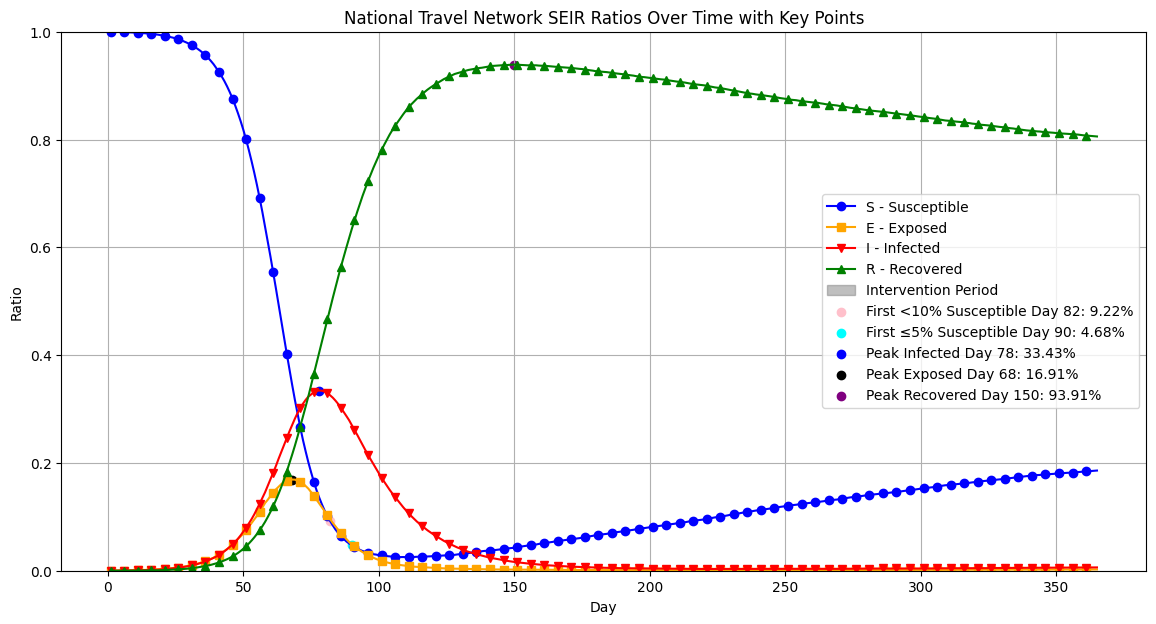

In [31]:
seir_plot(method_start=None, method_end=None, seir_history=seir_history)

In [32]:
# def seir_plot_all_locations(method_start, method_end, seir_history):
#     all_days = []
#     for day, df in seir_history.items():
#         df['Day'] = day
#         all_days.append(df.copy())

#     full_data = pd.concat(all_days)
    
#     colors = {'S': 'blue', 'E': 'orange', 'I': 'red', 'R': 'green'}
#     markers = {'S': 'o', 'E': 's', 'I': 'v', 'R': '^'}
#     marker_every = 5

#     locations = full_data.index.unique()

#     for location in locations:
#         if location == "Outside World":
#             continue
#         location_data = full_data.loc[location]
#         location_data['Total'] = location_data[['S', 'E', 'I', 'R']].sum(axis=1)
#         for compartment in ['S', 'E', 'I', 'R']:
#             location_data[f'{compartment}_ratio'] = location_data[compartment] / location_data['Total']

#         plt.figure(figsize=(14, 7))
#         for compartment in ['S_ratio', 'E_ratio', 'I_ratio', 'R_ratio']:
#             plt.plot(location_data['Day'], location_data[compartment], label=f'{compartment[0]} - {compartment.split("_")[0]}', marker=markers[compartment[0]], linestyle='-', markevery=marker_every, color=colors[compartment[0]])
            
#         plt.axvspan(method_start, method_end, color='grey', alpha=0.5, label='Intervention Period')
#         plt.title(f'SEIR Ratios Over Time for {location}')
#         plt.xlabel('Day')
#         plt.ylabel('Ratio')
#         plt.ylim(0, 1)
#         plt.legend()
#         plt.grid(True)
#         plt.show()


In [33]:
def seir_plot_all_locations(method_start, method_end, seir_history):
    all_days = []
    for day, df in seir_history.items():
        df['Day'] = day
        all_days.append(df.copy())

    full_data = pd.concat(all_days)
    
    colors = {'S': 'blue', 'E': 'orange', 'I': 'red', 'R': 'green'}
    markers = {'S': 'o', 'E': 's', 'I': 'v', 'R': '^'}
    marker_every = 5

    locations = full_data.index.get_level_values(0).unique()

    for location in locations:
        if location == "Outside World":
            continue
        location_data = full_data.loc[location]
        location_data['Total'] = location_data[['S', 'E', 'I', 'R']].sum(axis=1)
        for compartment in ['S', 'E', 'I', 'R']:
            location_data[f'{compartment}_ratio'] = location_data[compartment] / location_data['Total']

        plt.figure(figsize=(14, 7))
        for compartment in ['S_ratio', 'E_ratio', 'I_ratio', 'R_ratio']:
            plt.plot(location_data['Day'], location_data[compartment], label=f'{compartment[0]} - {compartment.split("_")[0]}', marker=markers[compartment[0]], linestyle='-', markevery=marker_every, color=colors[compartment[0]])

        # Highlight the intervention period
        plt.axvspan(method_start, method_end, color='grey', alpha=0.5, label='Intervention Period')

        # Identify key points
        max_I_idx = location_data['I_ratio'].idxmax()
        max_E_idx = location_data['E_ratio'].idxmax()
        max_R_idx = location_data['R_ratio'].idxmax()
        
        if not location_data[location_data['S_ratio'] < 0.1].empty:
            first_digit_zero_S_idx = location_data[location_data['S_ratio'] < 0.1].index[0]
            first_digit_zero_S_value = location_data.loc[first_digit_zero_S_idx, 'S_ratio'].iat[0]
            plt.scatter(first_digit_zero_S_idx, first_digit_zero_S_value, color='pink', label=f'First <10% Susceptible Day {first_digit_zero_S_idx}: {first_digit_zero_S_value:.2%}')
        
        if not location_data[location_data['S_ratio'] <= 0.05].empty:
            first_five_percent_S_idx = location_data[location_data['S_ratio'] <= 0.05].index[0]
            first_five_percent_S_value = location_data.loc[first_five_percent_S_idx, 'S_ratio'].iat[0]
            plt.scatter(first_five_percent_S_idx, first_five_percent_S_value, color='cyan', label=f'First ≤5% Susceptible Day {first_five_percent_S_idx}: {first_five_percent_S_value:.2%}')

        # Add scatter plot for key points
        max_I_value = location_data.loc[max_I_idx, 'I_ratio'].iat[0]
        max_E_value = location_data.loc[max_E_idx, 'E_ratio'].iat[0]
        max_R_value = location_data.loc[max_R_idx, 'R_ratio'].iat[0]
        plt.scatter(max_I_idx, max_I_value, color='blue', label=f'Peak Infected Day {max_I_idx}: {max_I_value:.2%}')
        plt.scatter(max_E_idx, max_E_value, color='black', label=f'Peak Exposed Day {max_E_idx}: {max_E_value:.2%}')
        plt.scatter(max_R_idx, max_R_value, color='purple', label=f'Peak Recovered Day {max_R_idx}: {max_R_value:.2%}')

        plt.title(f'SEIR Ratios Over Time for {location} with Key Points')
        plt.xlabel('Day')
        plt.ylabel('Ratio')
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True)
        plt.show()

In [34]:
#seir_plot_all_locations(method_start=None, method_end=None, seir_history=seir_history)

### 9. Lockdown Method

In [129]:
def temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=None):
    """
    Temporarily apply or lift lockdown measures based on the current simulation day, and restore matrices after lockdown ends.

    Args:
        day (int): Current simulation day.
        binary_matrix (pd.DataFrame): Binary connection matrix of communities.
        volume_matrix (pd.DataFrame): Volume matrix indicating the number of people that can migrate between communities.
        lockdown_communities (list): List of communities to lockdown.
        ls (int): Lockdown start day.
        le (int): Lockdown end day.
        method (str): 'binary' to cut connections, 'volume' to reduce traffic.
        reduction_factor (float): Factor by which to reduce the traffic, used only if method is 'volume'.
        original_matrices (dict): A dictionary containing original 'binary' and 'volume' matrices to restore after lockdown.

    Returns:
        tuple: Updated binary_matrix, volume_matrix
    """
    
    if ls <= day <= le:
        # Apply lockdown
        if method == 'binary':
            for community in lockdown_communities:
                for target in binary_matrix.columns:
                    if community != target:
                        binary_matrix.loc[community, target] = 0
                        binary_matrix.loc[target, community] = 0
        elif method == 'volume':
            for community in lockdown_communities:
                for target in volume_matrix.columns:
                    if community != target:
                        volume_matrix.loc[community, target] = int(volume_matrix.loc[community, target] * reduction_factor)
                        volume_matrix.loc[target, community] = int(volume_matrix.loc[target, community] * reduction_factor)
    elif day > le:
        # Restore original state after lockdown
        if original_matrices:
            binary_matrix.update(original_matrices['binary'])
            volume_matrix.update(original_matrices['volume'])

    return binary_matrix, volume_matrix





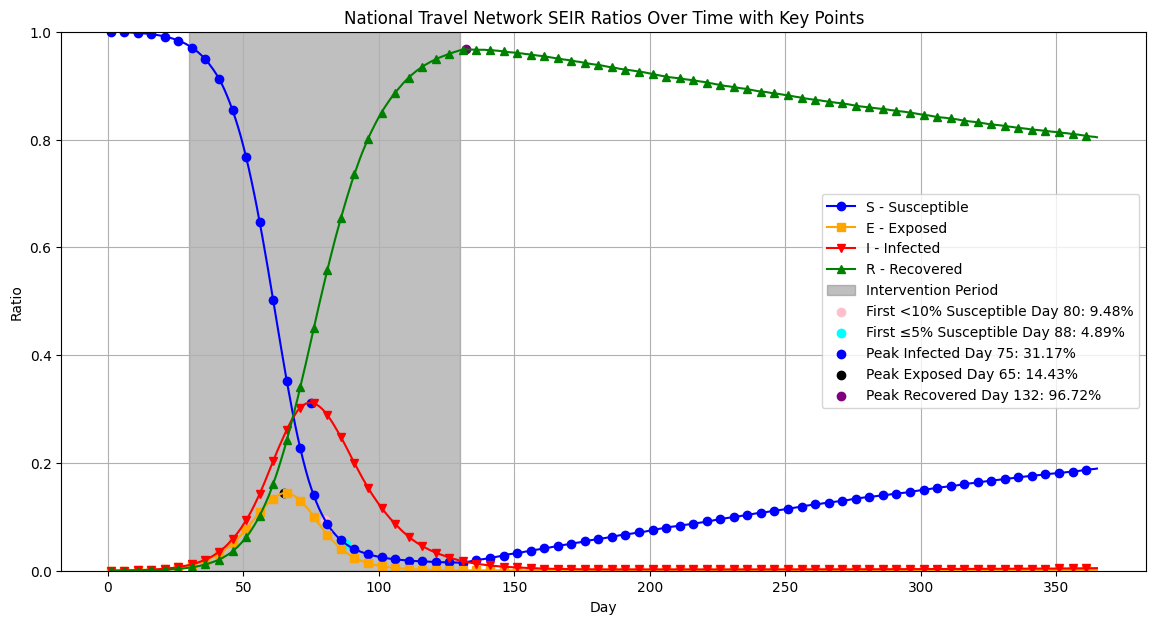

In [114]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.2  # Progression rate from exposed to infectious

ls = 30 # Lockdown start day
le = 130 # Lockdown end day


lockdown_outsideworld = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

original_binary_matrix = binary_matrix.copy()
original_volume_matrix = volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ls <= day <= le:
        lockdown_communities = ['Outside World'] # Lockdown location
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix, inbound)
        community_seir,new_cases = infection(α, β, γ, lockdown_communities, community_seir,0.5)
        lockdown_outsideworld[day] = community_seir
    else:
        lockdown_communities = []
        community_seir, migration_df = migration(community_seir, original_binary_matrix, original_volume_matrix,inbound)
        community_seir, new_cases = infection(α, β, γ, lockdown_communities, community_seir,1)
    #print(migration_df)
        lockdown_outsideworld[day] = community_seir

seir_plot(method_start=ls, method_end=le, seir_history=lockdown_outsideworld)

In [115]:
savefile(lockdown_outsideworld,'fp_lockdown_outsideworld')

All data saved to fp_lockdown_outsideworld.csv


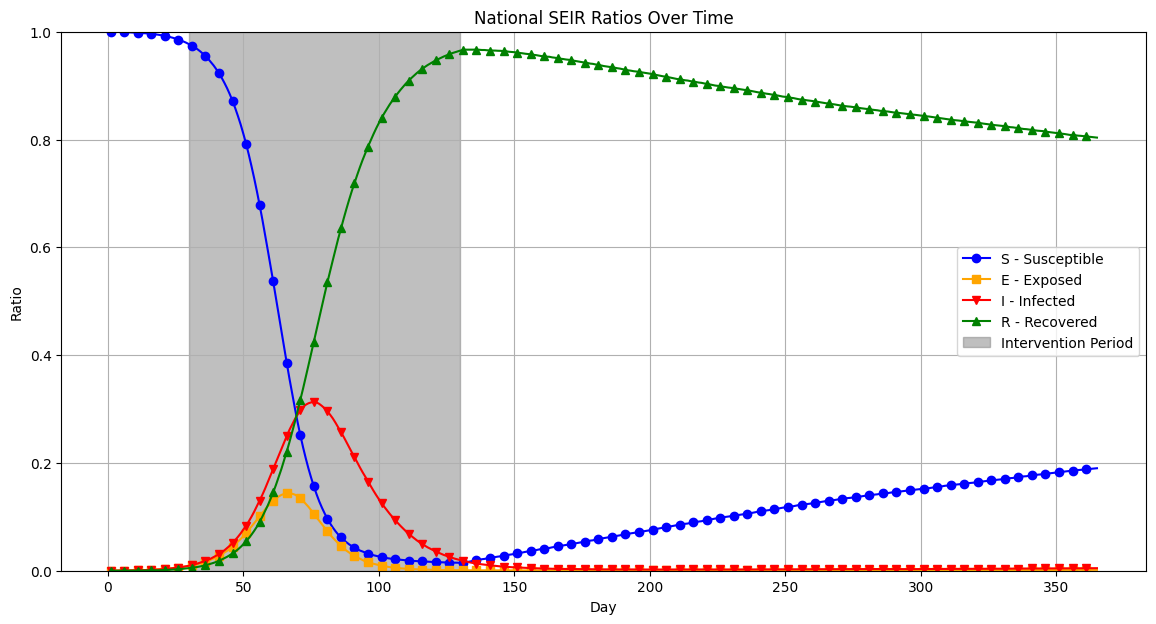

In [87]:
seir_plot(method_start=ls, method_end=le, seir_history=lockdown_outsideworld)

In [24]:
#seir_plot_all_locations(method_start=ls, method_end=le, seir_history=lockdown_outsideworld)

In [48]:
community

{'Outside World': 313600,
 'Ahe': 490,
 'Arutua': 1736,
 'Bora Bora': 10758,
 'Fakarava': 1679,
 'Gambier': 1570,
 'Hao': 1227,
 'Hiva Oa': 2371,
 'Huahine': 6263,
 'Makemo': 1391,
 'Manihi': 1138,
 'Mataiva': 292,
 'Maupiti': 1302,
 'Moorea': 18201,
 'Nuku Hiva': 3025,
 'Raiatea': 12388,
 'Raivavae': 900,
 'Rangiroa': 3761,
 'Rimatara': 893,
 'Rurutu': 2163,
 "Taha'a": 5296,
 'Tahiti': 191779,
 'Tikehau': 589,
 'Tubuai': 2185,
 'Ua Huka': 719,
 'Ua Pou': 2168}

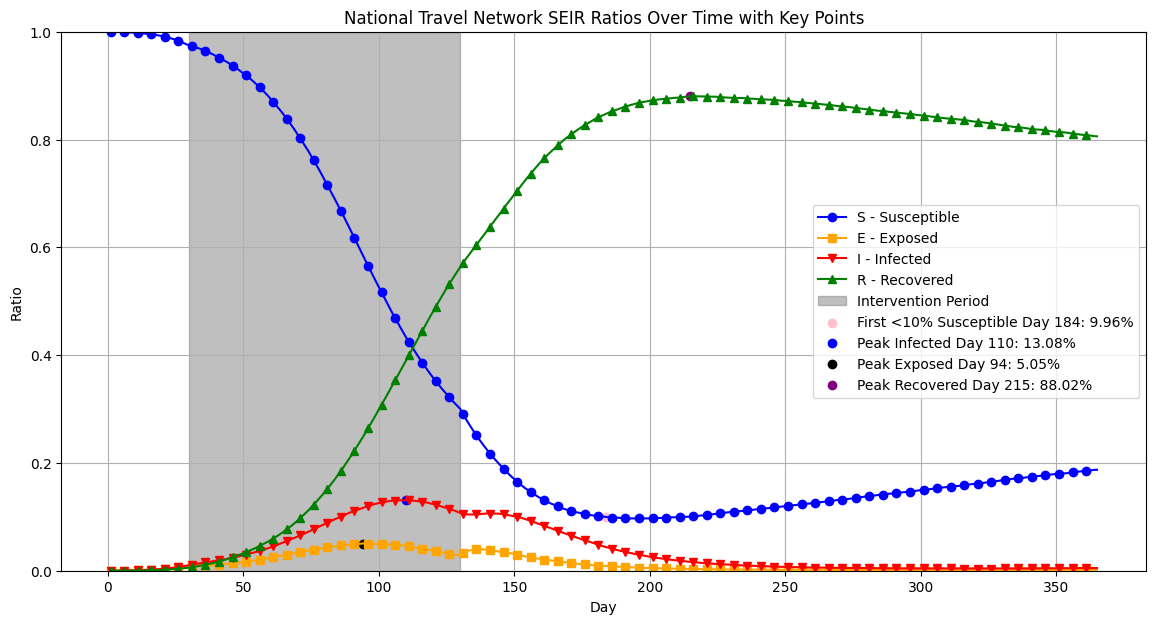

In [130]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ls = 30 # Lockdown start day
le = 130 # Lockdown end day


lockdownd_all = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

binary_matrix = original_binary_matrix.copy()
volume_matrix = original_volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ls <= day <= le:
        lockdown_communities = ['Outside World','Ahe','Arutua','Bora Bora','Fakarava','Gambier','Hao','Hiva Oa','Huahine','Makemo','Manihi','Mataiva','Maupiti','Moorea','Nuku Hiva','Raiatea','Raivavae','Rangiroa','Rimatara','Rurutu',"Taha'a",'Tahiti','Tikehau','Tubuai','Ua Huka','Ua Pou'] # Lockdown location
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix, inbound)
        community_seir,new_cases = infection(α, β, γ, lockdown_communities, community_seir,0.5)
        lockdownd_all[day] = community_seir
    else:
        lockdown_communities = []
        community_seir, migration_df = migration(community_seir, original_binary_matrix, original_volume_matrix,inbound)
        community_seir, new_cases = infection(α, β, γ, lockdown_communities, community_seir,1)
        #print(migration_df)
        lockdownd_all[day] = community_seir

seir_plot(method_start=ls, method_end=le, seir_history=lockdownd_all)


In [131]:
savefile(lockdownd_all,'fp_lockdown_all')

All data saved to fp_lockdown_all.csv


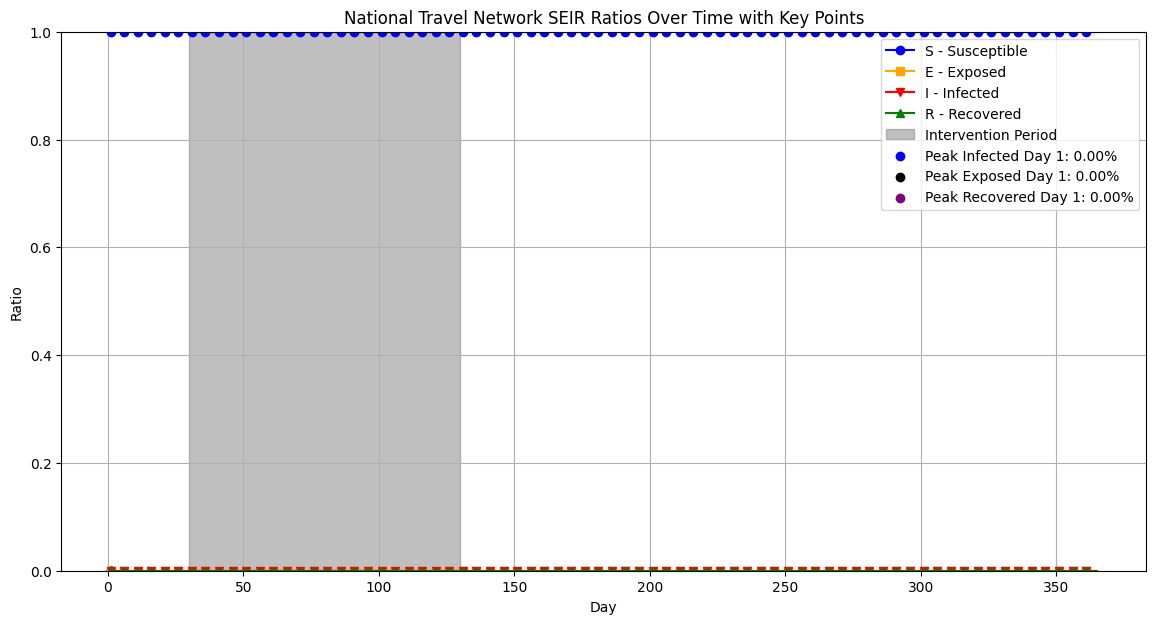

In [53]:
seir_plot(method_start=ls, method_end=le, seir_history=lockdownd_all)

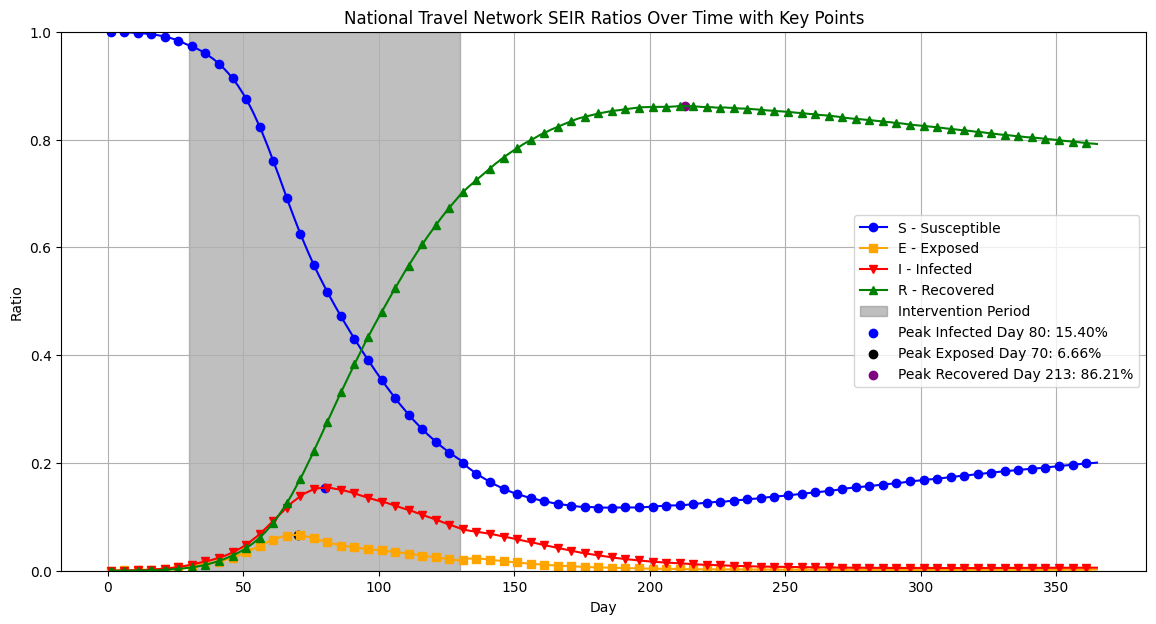

In [146]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ls = 30 # Lockdown start day
le = 130 # Lockdown end day



lockdown_outside_tahiti = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

original_binary_matrix = binary_matrix.copy()
original_volume_matrix = volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ls <= day <= le:
        lockdown_communities = ['Outside World', 'Tahiti'] # Lockdown location
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix, inbound)
        community_seir,new_cases = infection(α, β, γ, lockdown_communities, community_seir,0.5)
        lockdown_outside_tahiti[day] = community_seir
    else:
        lockdown_communities = []
        community_seir, migration_df = migration(community_seir, original_binary_matrix, original_volume_matrix,inbound)
        community_seir, new_cases = infection(α, β, γ, lockdown_communities, community_seir,1)
    #print(migration_df)
        lockdown_outside_tahiti[day] = community_seir

seir_plot(method_start=ls, method_end=le, seir_history=lockdown_outside_tahiti)

In [147]:
savefile(lockdown_outside_tahiti,'fp_lockdown_outside_tahiti')

All data saved to fp_lockdown_outside_tahiti.csv


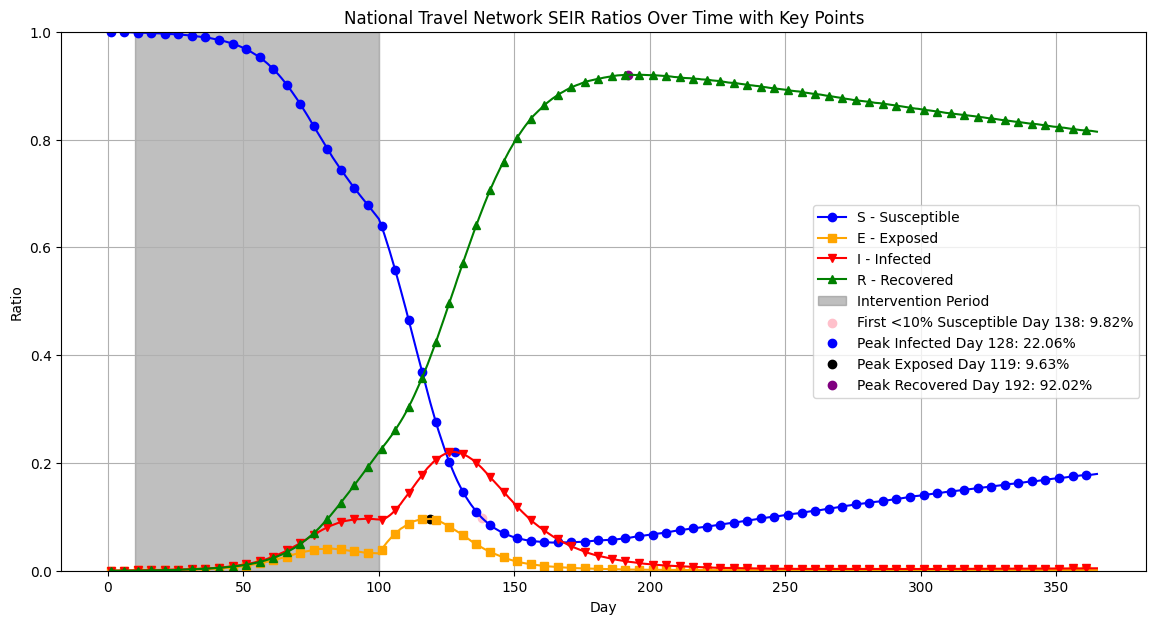

In [179]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ls = 10 # Lockdown start day
le = 100 # Lockdown end day



lockdownd_tahiti_borabora = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

original_binary_matrix = binary_matrix.copy()
original_volume_matrix = volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ls <= day <= le:
        lockdown_communities = ['Tahiti','Bora Bora'] # Lockdown location
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix, inbound)
        community_seir,new_cases = infection(α, β, γ, lockdown_communities, community_seir,0.5)
    else:
        lockdown_communities = []
        community_seir, migration_df = migration(community_seir, original_binary_matrix, original_volume_matrix,inbound)
        community_seir, new_cases = infection(α, β, γ, lockdown_communities, community_seir,1)
    #print(migration_df)
    lockdownd_tahiti_borabora[day] = community_seir
        
seir_plot(method_start=ls, method_end=le, seir_history=lockdownd_tahiti_borabora)

In [180]:
savefile(lockdownd_tahiti_borabora,'fp_lockdownd_tahiti_borabora')

All data saved to fp_lockdownd_tahiti_borabora.csv


### 10. Social Distance

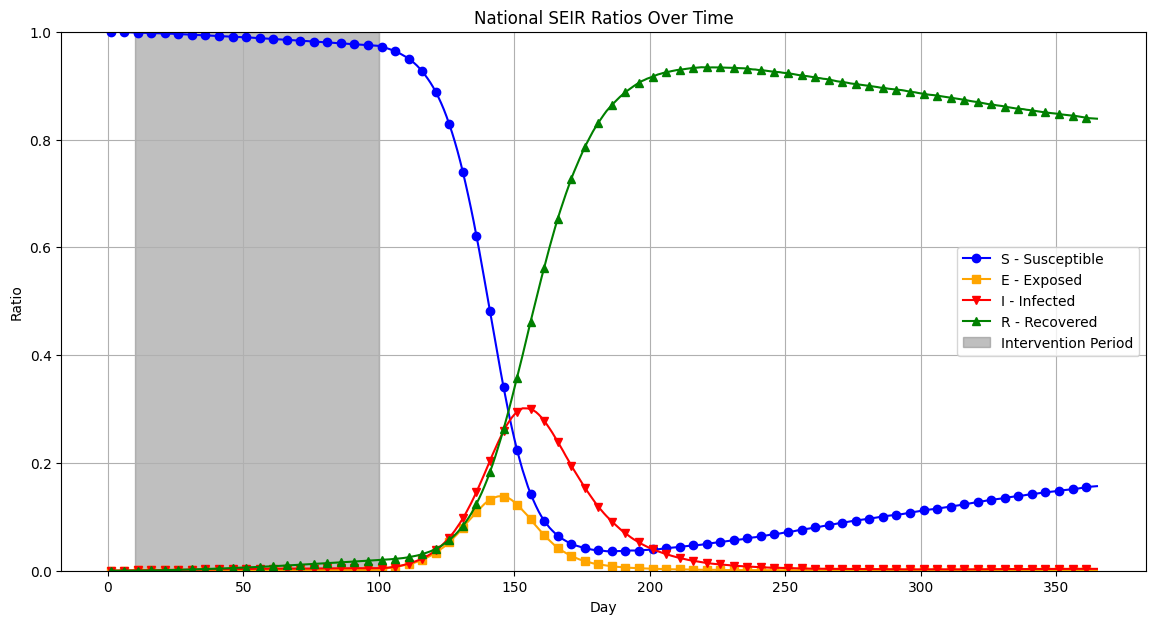

In [119]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ss = 10 # Social distance start day
se = 100 # Social distance end day

social_1m = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ss <= day <= se:
        social_volume = volume_matrix * 0.5
        social_α = α * 0.2 
        community_seir, migration_df = migration(community_seir, binary_matrix, social_volume,inbound)
        community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix,inbound)
        community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    social_1m[day] = community_seir

seir_plot(method_start=ss, method_end=se, seir_history=social_1m)

In [120]:
savefile(social_1m,'fp_social_1m')

All data saved to fp_social_1m.csv


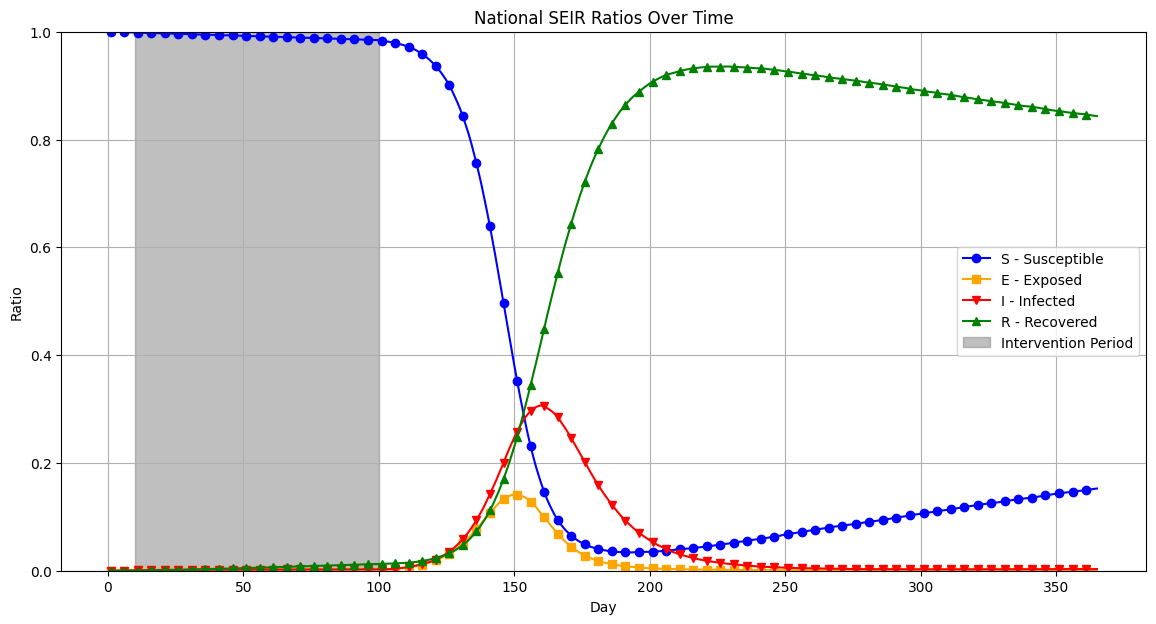

In [122]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ss = 10 # Social distance start day
se = 100 # Social distance end day

social_2m = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ss <= day <= se:
        social_volume = volume_matrix * 0.5
        social_α = α * 0.2 * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, social_volume,inbound)
        community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix,inbound)
        community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    social_2m[day] = community_seir
    
seir_plot(method_start=ss, method_end=se, seir_history=social_2m)

In [123]:
savefile(social_2m,'fp_social_2m')

All data saved to fp_social_2m.csv


In [121]:
#seir_plot_all_locations(method_start=ss, method_end=se, seir_history=social_seir_history)

### 11. Work From Home

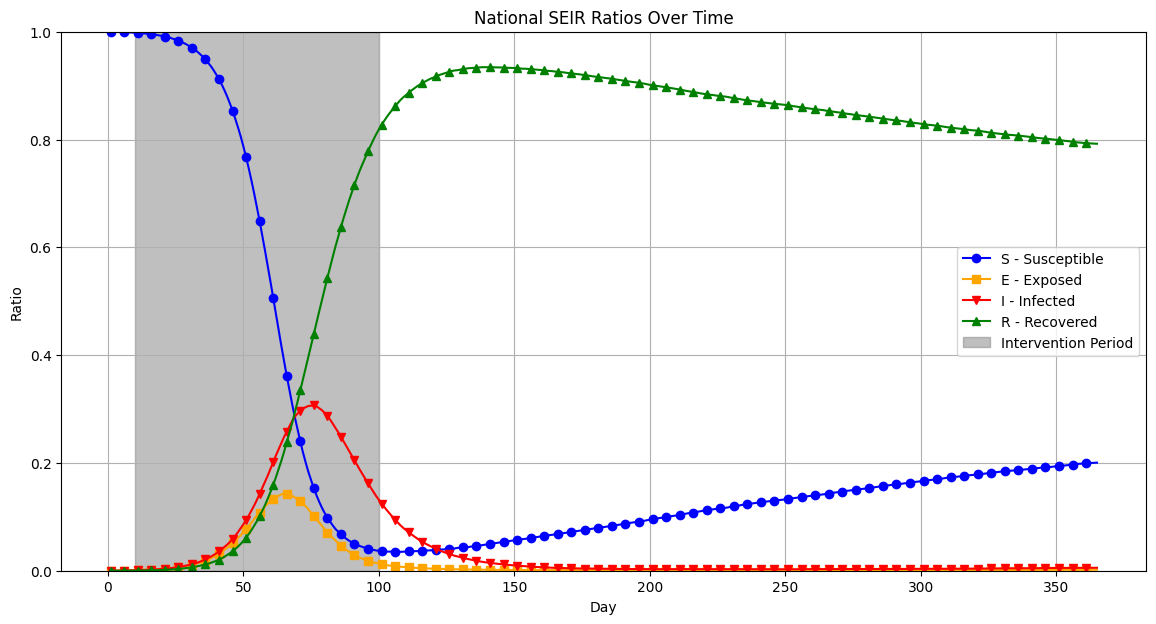

All data saved to fp_wfh_20.csv


In [126]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ws = 10 # Work from home start day
we = 100 # Work from home end day

wfh_20 = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ws <= day <= we:
        work_volume = volume_matrix * 0.2
        #social_α = α * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, work_volume, inbound)
        #community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
    community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    wfh_20[day] = community_seir
    
seir_plot(method_start=ws, method_end=we, seir_history=wfh_20)
savefile(wfh_20,'fp_wfh_20')

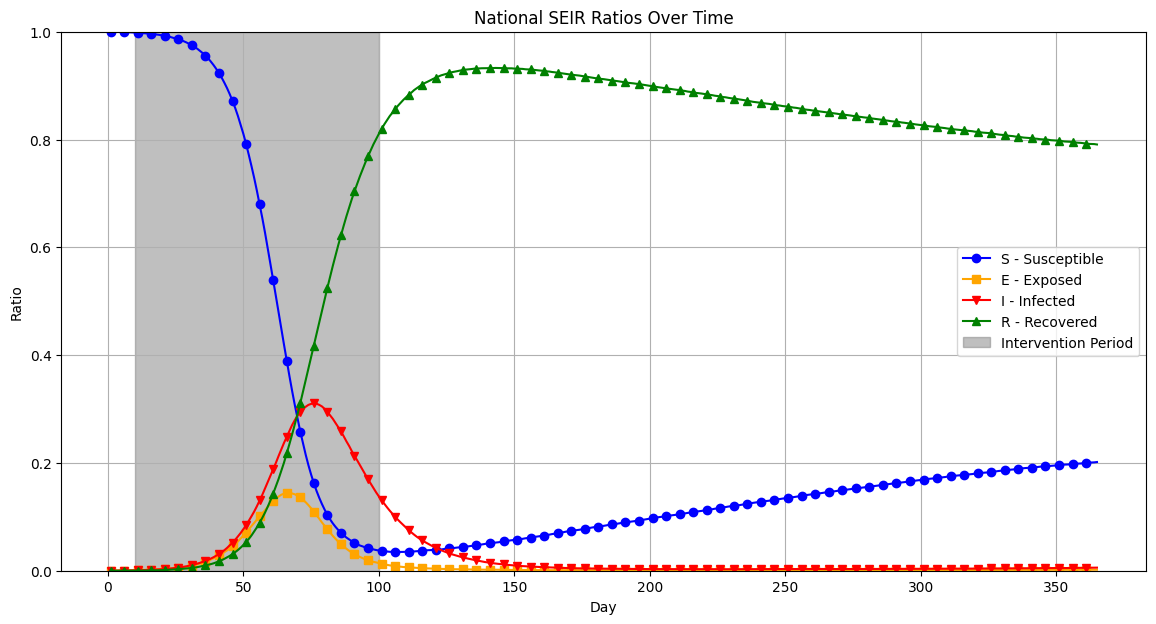

All data saved to fp_wfh_50.csv


In [127]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ws = 10 # Work from home start day
we = 100 # Work from home end day

wfh_50 = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ws <= day <= we:
        work_volume = volume_matrix * 0.5
        #social_α = α * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, work_volume, inbound)
        #community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
    community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    wfh_50[day] = community_seir
    
seir_plot(method_start=ws, method_end=we, seir_history=wfh_50)
savefile(wfh_50,'fp_wfh_50')

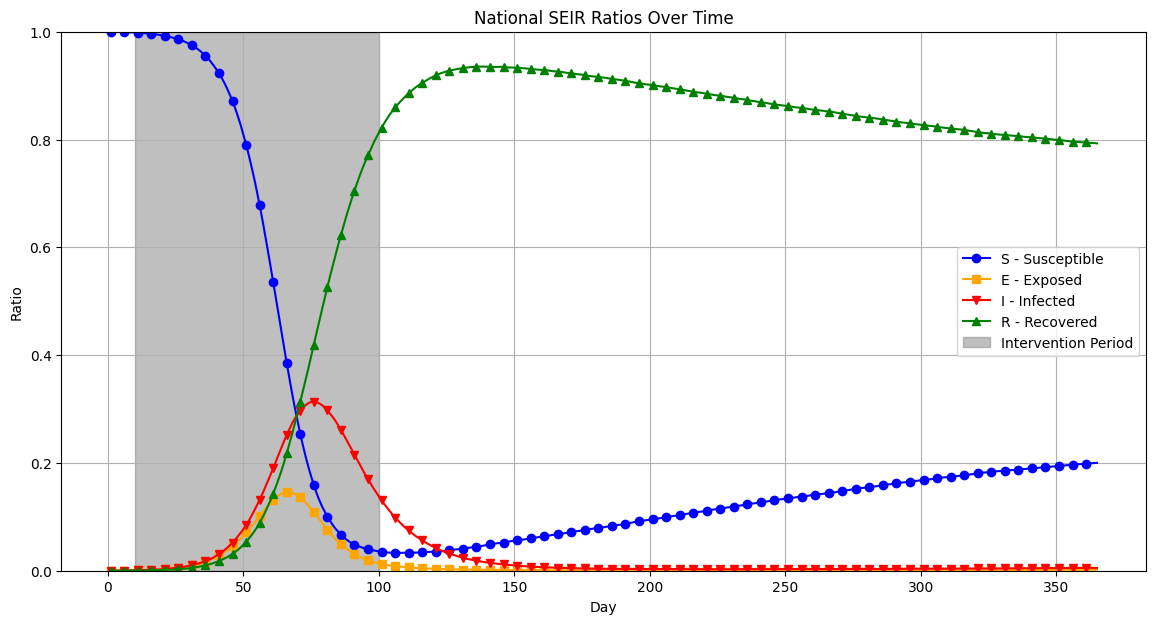

All data saved to fp_wfh_80.csv


In [128]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ws = 10 # Work from home start day
we = 100 # Work from home end day

wfh_80 = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ws <= day <= we:
        work_volume = volume_matrix * 0.8
        #social_α = α * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, work_volume, inbound)
        #community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
    community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    wfh_80[day] = community_seir
    
seir_plot(method_start=ws, method_end=we, seir_history=wfh_80)
savefile(wfh_80,'fp_wfh_80')

In [124]:
#seir_plot_all_locations(method_start=ws, method_end=we, seir_history=work_seir_history)

### 12. Face Mask

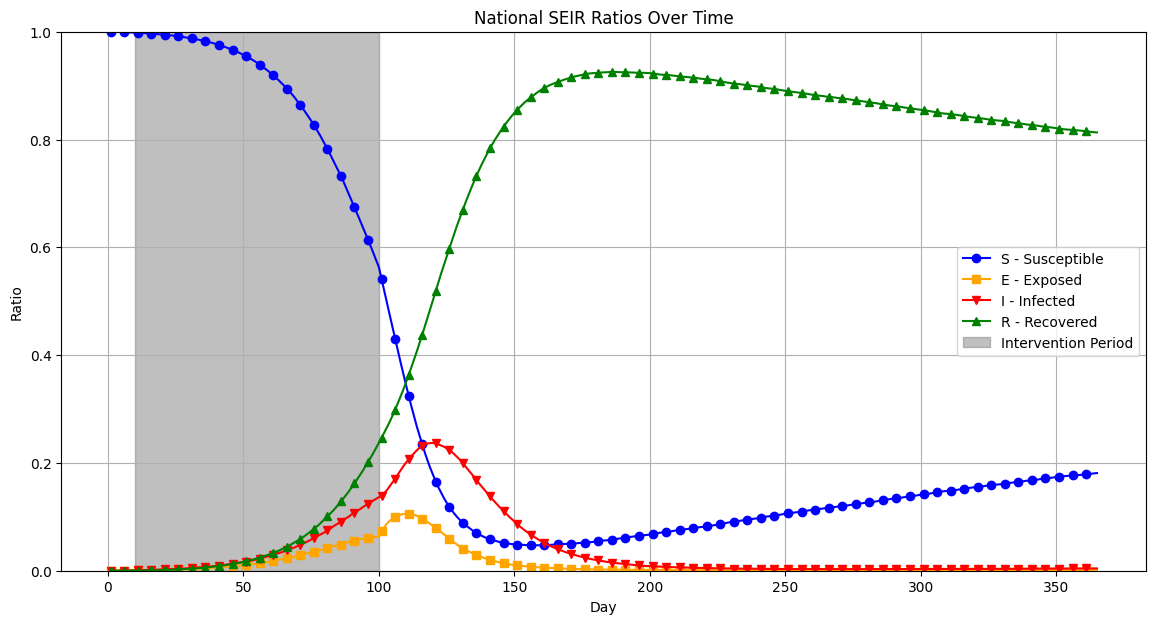

All data saved to fp_mask_cloth.csv


In [129]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ms = 10 # Social distance start day
me = 100 # Social distance end day

mask_cloth = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ms <= day <= me:
        mask_α = α * (1 - 0.44)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir = infection(mask_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    mask_cloth[day] = community_seir
    
seir_plot(method_start=ms, method_end=me, seir_history=mask_cloth)
savefile(mask_cloth,'fp_mask_cloth')

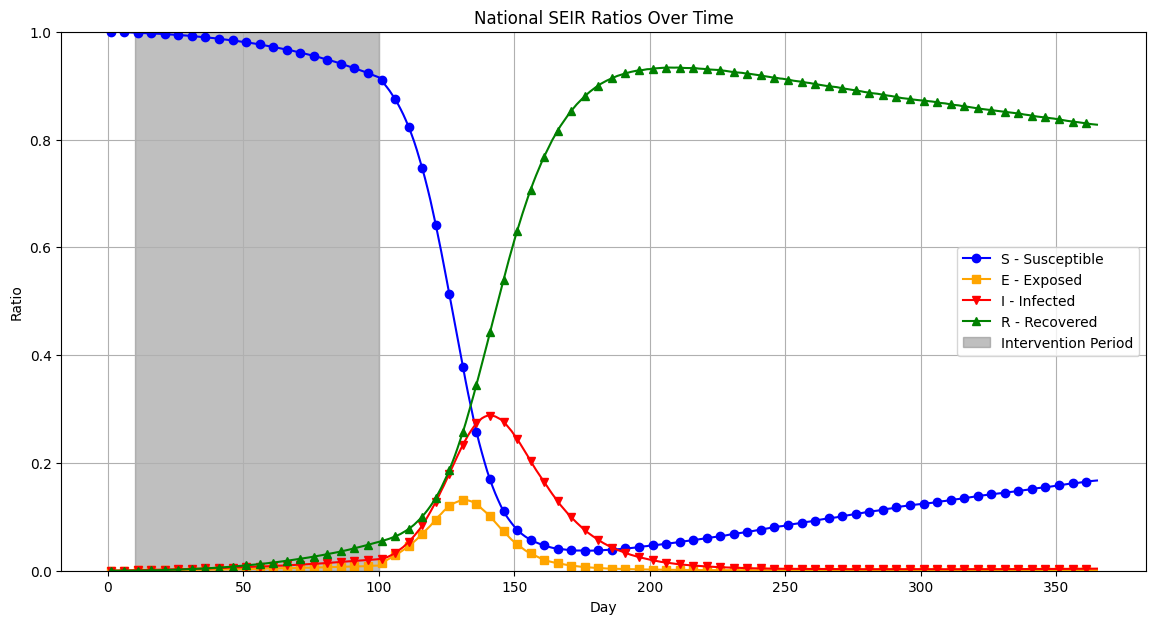

All data saved to fp_mask_surgical.csv


In [130]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ms = 10 # Social distance start day
me = 100 # Social distance end day

mask_surgical = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ms <= day <= me:
        mask_α = α * (1 - 0.66)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir = infection(mask_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    mask_surgical[day] = community_seir
    
seir_plot(method_start=ms, method_end=me, seir_history=mask_surgical)
savefile(mask_surgical,'fp_mask_surgical')

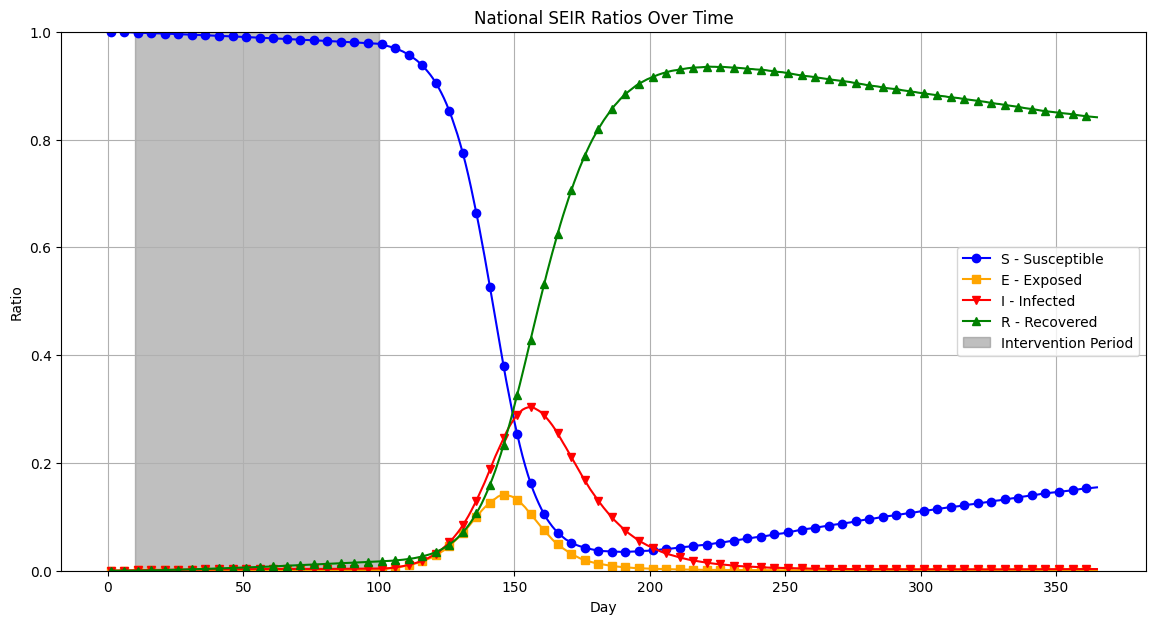

All data saved to fp_mask_N95.csv


In [131]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

ms = 10 # Social distance start day
me = 100 # Social distance end day

mask_N95 = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if ms <= day <= me:
        mask_α = α * (1 - 0.83)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir = infection(mask_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    mask_N95[day] = community_seir
    
seir_plot(method_start=ms, method_end=me, seir_history=mask_N95)
savefile(mask_N95,'fp_mask_N95')

In [132]:
#seir_plot_all_locations(method_start=ms, method_end=me, seir_history=mask_seir_history)

In [53]:

def vaccine(vaccination_rate, community_seir):
    
    community_seir = community_seir.copy()

    # Initialize SEIR columns
    vaccinated = vaccination_rate * community_seir['S']
    community_seir['S'] = community_seir['S'] - vaccinated
    community_seir['R'] = community_seir['R'] + vaccinated

        
    community_seir.loc['Outside World', 'Population'] = 0
    community_seir.loc['Outside World', 'S'] = 0
    community_seir.loc['Outside World', 'E'] = 0
    community_seir.loc['Outside World', 'I'] = 0
    community_seir.loc['Outside World', 'R'] = 0

    # Calculate the population ratios of S, E, I, and R
    community_seir['S_ratio'] = community_seir['S'] / community_seir['Population']
    community_seir['E_ratio'] = community_seir['E'] / community_seir['Population']
    community_seir['I_ratio'] = community_seir['I'] / community_seir['Population']
    community_seir['R_ratio'] = community_seir['R'] / community_seir['Population']
    

    return community_seir


In [133]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.071  # Recovery rate
γ = 0.20  # Progression rate from exposed to infectious

vs = 10 # Social distance start day
ve = 100 # Social distance end day
vaccination_rate = 0.001
vaccine_001rate = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, community_seir)
    if vs <= day <= ve:
        community_seir = vaccine(vaccination_rate, community_seir)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir = infection(α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix, inbound)
        community_seir = infection(α, β, γ, community_seir)
    #print(migration_df)
    vaccine_001rate[day] = community_seir

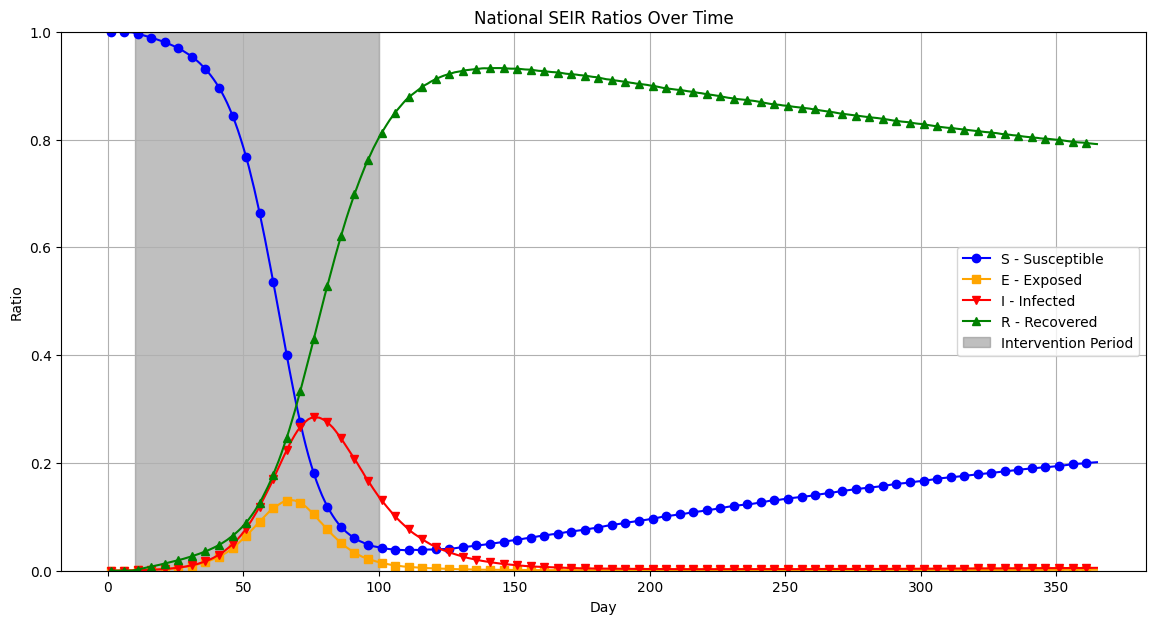

All data saved to fp_vaccine_001rate.csv


In [134]:
seir_plot(method_start=vs, method_end=ve, seir_history=vaccine_001rate)
savefile(vaccine_001rate,'fp_vaccine_001rate')